# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [1]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests

# Import API key
from api_keys import geoapify_key

In [7]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv(r"C:/Users/bdhai/Downloads/cities.csv")

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

<Axes: xlabel='Lng', ylabel='Lat'>

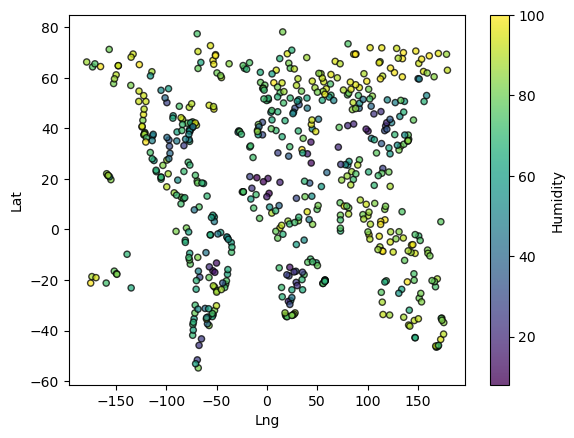

In [11]:
%%capture --no-display

# Configure the map plot
city_map = city_data_df.plot.scatter(x="Lng", y="Lat", c="Humidity", colormap="viridis", alpha=0.75, edgecolors="k")

# Display the map
city_map

### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [13]:
# Narrow down cities that fit criteria and drop any results with null values
filtered_cities = city_data_df[(city_data_df["Max Temp"] > 20) & (city_data_df["Humidity"] < 70)]

# Drop any rows with null values
filtered_cities = filtered_cities.dropna()

# Display sample data
filtered_cities.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
9,9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
12,12,trairi,-3.2778,-39.2689,31.07,51,34,8.09,BR,1666108038
22,22,guiratinga,-16.3494,-53.7583,38.35,14,22,3.10,BR,1666108243
23,23,rikitea,-23.1203,-134.9692,20.41,65,77,9.23,PF,1666108244


### Step 3: Create a new DataFrame called `hotel_df`.

In [15]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
hotel_df = city_data_df[["City", "Country", "Lat", "Lng", "Humidity"]].copy()

# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
hotel_df["Hotel Name"] = ""

# Display sample data
hotel_df.head()


,City,Country,Lat,Lng,Humidity,Hotel Name
0,faya,SA,18.3851,42.4509,35,
1,farsund,NO,58.0948,6.8047,100,
2,new norfolk,AU,-42.7826,147.0587,58,
3,jamestown,US,42.0970,-79.2353,77,
4,lanzhou,CN,36.0564,103.7922,48,


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [6]:
# Set parameters to search for a hotel
radius = 500
params = {
    "categories": "accommodation.hotel",
    "apiKey": #retrieveapikey",
    "limit": 1
}

# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # get latitude, longitude from the DataFrame
    lat, lng = row["Lat"], row["Lng"]

    # Add the current city's latitude and longitude to the params dictionary
    params["filter"] = f"circle:{lng},{lat},{radius}"
    params["bias"] = f"proximity:{lng},{lat}"

    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"

    # Make and API request using the params dictionary
    name_address = # YOUR CODE HERE

    # Convert the API response to JSON format
    name_address = # YOUR CODE HERE

    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_df.loc[index, "Hotel Name"] = name_address["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"

    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# Display sample data
hotel_df

Starting hotel search
saint-pierre - nearest hotel: Tropic Hotel
badger - nearest hotel: Clarion Hotel & Suites
ust'-kulom - nearest hotel: No hotel found
emerald - nearest hotel: Emerald Central Hotel
newman - nearest hotel: No hotel found
fort bragg - nearest hotel: Airborne Inn Lodging
laguna - nearest hotel: Holiday Inn Express & Suites
nova vicosa - nearest hotel: Pousada Pontal da Barra
fort myers shores - nearest hotel: Comfort Inn Fort Myers
trinity beach - nearest hotel: Blue Lagoon Resort
racine - nearest hotel: No hotel found
six-fours-les-plages - nearest hotel: Kyriad Direct La Seyne-sur-Mer
porto velho - nearest hotel: Hotel Slaviero Essential Porto Velho
posto fiscal rolim de moura - nearest hotel: No hotel found
port douglas - nearest hotel: Mantra Aqueous Port Douglas
roswell - nearest hotel: Best Western Plus Hotel
hell-ville - nearest hotel: ABUD HOTEL
sona - nearest hotel: Al Bosco
morehead city - nearest hotel: Bask Hotel Big Rock Landing, Trademark Collection by W

,City,Country,Lat,Lng,Humidity,Hotel Name
43,saint-pierre,RE,-21.3393,55.4781,61,Tropic Hotel
66,badger,US,64.8000,-147.5333,37,Clarion Hotel & Suites
102,ust'-kulom,RU,61.6864,53.6902,43,No hotel found
120,emerald,AU,-23.5333,148.1667,28,Emerald Central Hotel
130,newman,US,37.3138,-121.0208,51,No hotel found
138,fort bragg,US,35.1390,-79.0060,80,Airborne Inn Lodging
146,laguna,US,38.4210,-121.4238,52,Holiday Inn Express & Suites
160,nova vicosa,BR,-17.8919,-39.3719,87,Pousada Pontal da Barra
170,fort myers shores,US,26.7092,-81.7459,95,Comfort Inn Fort Myers
176,trinity beach,AU,-16.7888,145.6968,44,Blue Lagoon Resort


### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

In [7]:
%%capture --no-display

# Configure the map plot
# YOUR CODE HERE

# Display the map
# YOUR CODE HERE

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (City,Humidity,Hotel Name,Country)